# Fruit Classification Using a Convolutional Neural Network
*A Thinkful Checkpoint Challenge, by Kalika Kay*

This project uses the [fruit classification 3360](https://www.kaggle.com/moltean/fruits) dataset from Kaggle to build, train, test, and report using a Convolutional Neural Network. 

The code that's commented out is available for individuals who would like to download the project and give it a run. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Look at the data folders. 

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session/kaggle/input/fruits/fruits-360/Training/Quince/r_250_100.jpg
#/kaggle/input/fruits/fruits-360/Training/Quince/64_100.jpg


In [2]:
#Look at the data folders. 
# for dirname, _, filenames in os.walk('/kaggle/input/fruits/fruits-360/Test'):
#      for filename in filenames:
#         print(os.path.join(dirname, filename))

# Data Exploration:

A portion of the data exploration process is in exploring the tools and research that was provided by the individuals that created this Fruits 360 dataset. I also had to go outside my current realm of knowledge and learn some knew things about how to work with data in this format.

In some of my reading, specifically the pdf file, I have learned that these images are scaled to 100X100 pixels. 

The additional exploration listings of the sections above were also from perusing the folders availble.

I'm [opting to learn](http://https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/) to load the data using the [Keras image data generator](http://https://keras.io/api/preprocessing/image/). 

In [3]:
# Import the generator.
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# create generator
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [5]:
#Parent directory.
parent = '/kaggle/input/fruits/fruits-360/'


#parameters
class_mode = 'categorical'

# prepare an iterators for each dataset
train = datagen.flow_from_directory(f'{parent}Training', 
                                    class_mode=class_mode, 
                                    target_size =(100,100), 
                                    shuffle=True,
                                    batch_size=32,
                                    subset="training")

valid_generator=datagen.flow_from_directory(f'{parent}Training',
                                            shuffle=True,
                                            class_mode=class_mode,
                                            target_size=(100,100), 
                                            batch_size=32,
                                            subset="validation")

# create generator
datagen = ImageDataGenerator(rescale=1./255.)
#Shuffle off for test data so that I can run the classification report against prediction made on this data. 
test = datagen.flow_from_directory(f'{parent}Test', 
                                   shuffle=False,
                                   class_mode=class_mode,
                                   batch_size = 1,
                                   target_size=(100,100))
# confirm the iterator works
batchX, batchy = train.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 50812 images belonging to 131 classes.
Found 16880 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Batch shape=(32, 100, 100, 3), min=0.000, max=1.000


In [6]:
#Constants for model building.
STEP_SIZE_TRAIN=train.n//train.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#I won't be taking any additonal steps during the prediction modeling.
#STEP_SIZE_TEST=test.n//test.batch_size

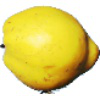

In [7]:
# Import the generator.
from keras.preprocessing import image as img

#Just wanted to look at one of them. 
image = img.load_img(f'{parent}Training/Quince/r_305_100.jpg')
image

[Visualizing](http://https://keras.io/examples/vision/image_classification_from_scratch/) the data using the data set from directory method available in Keras.

In [8]:
from keras import preprocessing as pp
ds = pp.image_dataset_from_directory(
    f'{parent}Training',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 67692 files belonging to 131 classes.


In [9]:
#Print the features names.
print(ds.class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

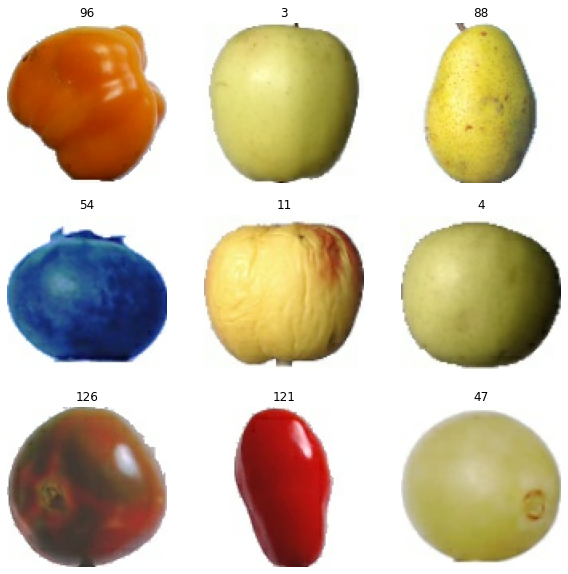

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# CNN Classification

Reference are primarily from [this tutorial](https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c), [Keras](https://keras.io/api/optimizers/) and [Tensorflow](https://www.tensorflow.org/tutorials/images/cnn)

In [7]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
from keras.models import Sequential

In [12]:
CNN_model = Sequential()

#Input Layer
CNN_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100,100,3)))
CNN_model.add(Activation('relu'))


CNN_model.add(Conv2D(32, (3, 3)))
CNN_model.add(Activation('relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))


CNN_model.add(Conv2D(64, (3, 3), padding='same'))
CNN_model.add(Activation('relu'))


CNN_model.add(Conv2D(64, (3, 3)))
CNN_model.add(Activation('relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))


CNN_model.add(Flatten())
CNN_model.add(Dense(512))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))

#Output Layer
CNN_model.add(Dense(131, activation='softmax'))

CNN_model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        1

In [14]:
CNN_history = CNN_model.fit_generator(generator=train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,            
                    epochs = 5)

Epoch 1/5
1587/1587 [==============================] - 561s 354ms/step - loss: 1.7629 - accuracy: 0.5621 - val_loss: 0.5139 - val_accuracy: 0.8572
Epoch 2/5
1587/1587 [==============================] - 114s 72ms/step - loss: 0.2305 - accuracy: 0.9284 - val_loss: 0.3170 - val_accuracy: 0.9147
Epoch 3/5
1587/1587 [==============================] - 113s 72ms/step - loss: 0.0950 - accuracy: 0.9704 - val_loss: 0.3193 - val_accuracy: 0.9255
Epoch 4/5
1587/1587 [==============================] - 113s 71ms/step - loss: 0.0542 - accuracy: 0.9827 - val_loss: 0.3744 - val_accuracy: 0.9335
Epoch 5/5
1587/1587 [==============================] - 116s 73ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.3607 - val_accuracy: 0.9414


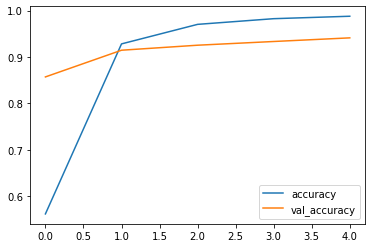

In [15]:
CNN_results = pd.DataFrame(CNN_history.history)
CNN_results[['accuracy', 'val_accuracy']].plot()

It looks like the CNN model did really well with five repeats. I'm going to go ahead and predict the model. 

In [16]:
#Now we run a prediction method on the test dataset.
test.reset()
pred=CNN_model.predict_generator(test,
verbose=1)

22688/22688 [==============================] - 216s 10ms/step


In [17]:
from sklearn.metrics import classification_report

predicted_class_indices=np.argmax(pred,axis=-1) 
#predicted_class_indices=(model.predict(x) > 0.5).astype("int32") #binary class identification.
y_true = test.classes

print(classification_report(y_true, 
                            predicted_class_indices, 
                            target_names=train.class_indices))

                     precision    recall  f1-score   support

     Apple Braeburn       0.76      0.43      0.55       164
 Apple Crimson Snow       0.86      1.00      0.92       148
     Apple Golden 1       0.99      1.00      1.00       160
     Apple Golden 2       0.89      1.00      0.94       164
     Apple Golden 3       0.65      1.00      0.79       161
 Apple Granny Smith       0.99      0.80      0.89       164
    Apple Pink Lady       0.92      1.00      0.96       152
        Apple Red 1       0.82      0.86      0.84       164
        Apple Red 2       0.98      1.00      0.99       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       0.92      0.88      0.90       164
 Apple Red Yellow 2       1.00      0.92      0.96       219
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe    

# CNN Conclusion

The project started out a bit more complicated. I wanted to also complete an RNN model with this dataset, but I ran out of time to get a successful RNN model working. The results from the RNN model turned out remarkably terrible and, therefore; did not make it to this submission. 

For the curious, the code and results from that *lesson* are also available on [github](https://github.com/KalikaKay/Thinkful-Notebooks/blob/main/fruit-classification.ipynb) under the RNN Classification portion. If you do decide to look into that entire notebook; pay no attention to the conclusions. I managed to resolve the issue wiht the classification report with a minor adjustment. 